# Most Desired Skills

### Dinakar Kulkarni, 5/14/2018

This notebook will show you which skills are most desired in the job market. The analysis is based on real-time job postings on indeed.com.

> Import the necessary Python packages

In [1]:
from IPython.core.display import display
from ipywidgets import widgets
import requests
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Specify the Job title

In [2]:
job_title_input = widgets.Text(value = "DevOps Engineer",
                               placeholder = 'Enter Job Title. Eg. Software Engineer',
                               description = 'Job Title',
                               disabled = False)
display(job_title_input)
job_title = job_title_input.value

Text(value='DevOps Engineer', description='Job Title', placeholder='Enter Job Title. Eg. Software Engineer')

> Specify the Location

In [3]:
location_input = widgets.Text(value = "Los Angeles",
                              placeholder = 'Enter Location. Eg. New York',
                              description = 'Job Location',
                              disabled = False)
display(location_input)
location = location_input.value

Text(value='Los Angeles', description='Job Location', placeholder='Enter Location. Eg. New York')

> Define the function that extracts this info from indeed.com

In [4]:
def get_skill_info(job_title, location = "San Francisco", page_limit = 5):
    job_title = job_title.replace(" ", "+")
    location = location.replace(" ", "+")
    URL = 'https://www.indeed.com/jobs?q=' + job_title + '&l=' + location
    all_skills = []
    for page_no in range(1,page_limit):
        newurl = URL + '&start=' + str(page_no)
        page = requests.get(newurl)
        soup = BeautifulSoup(page.text, 'html5lib')
        experienceList = soup.find_all(lambda tag: tag.name == 'span' and 
                              tag.get('class') == ['experienceList'])
        skills = []
        for exp in experienceList:
            y = exp.get_text()
            skills.append(y)
        
        for skill in skills:
            all_skills.append(skill)
            
    return(all_skills)

> The function returns a list of skills per job opening. We'll get that list here for 20 pages worth of search results:

In [5]:
skill_list = get_skill_info(job_title, location, 20)

> We'll munge that a bit here to get a consolidated skill list

In [6]:
stringed_skill_list = ",".join(skill_list)
skill_vector = stringed_skill_list.split(",")

> Get a summary of the skills with the help of the `Counter` function from the `collections` package

In [7]:
counter = Counter(skill_vector)
skill_names = counter.keys()
skill_count = counter.values()

> Convert the counter dictionary to a `pandas Series`

In [8]:
df = pd.DataFrame(list(counter.items()), columns=['Skill', 'Count'])
df = df.sort_values(['Count'], ascending = 0)

> Visualize the first few entries of the Series

In [9]:
df.head()

,Skill,Count
27,AWS,84
25,Python,64
8,Puppet,50
30,Docker,42
16,Ansible,41


> Visualize the results to show the top 10 most desired skills

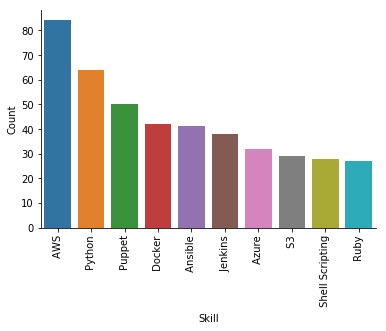

In [10]:
sns.barplot(x='Skill', y='Count', data=df[:10])
sns.despine()
plt.xticks(rotation=90)
plt.show()